In [2]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
import matplotlib.pyplot as plt

In [3]:
dtype = torch.FloatTensor

In [4]:
# 3 words sentence
sentences = [ "i like dog", "i like cat", "i like animal",
              "dog cat animal", "apple cat dog like", "dog fish milk like",
              "dog cat eyes like", "i like apple", "apple i hate",
              "apple i movie book music like", "cat dog hate", "cat dog like"]
word_sequence = " ".join(sentences).split()
word_list = " ".join(sentences).split()
word_list = list(set(word_list))
word_dict = {w: i for i, w in enumerate(word_list)}
print(word_list)
print(word_dict)

['hate', 'milk', 'animal', 'i', 'apple', 'dog', 'eyes', 'cat', 'like', 'fish', 'movie', 'music', 'book']
{'hate': 0, 'milk': 1, 'animal': 2, 'i': 3, 'apple': 4, 'dog': 5, 'eyes': 6, 'cat': 7, 'like': 8, 'fish': 9, 'movie': 10, 'music': 11, 'book': 12}


In [5]:
# Word2Vec parameter 
batch_size = 20 # To show 2 dimensional embedding graph
embedding_size = 2 # To show 2 dimensional embedding graph
voc_size = len(word_list)

In [6]:
# Make a random batch
def random_batch(data, size):
    random_inputs = []
    random_labels = []
    random_index =  np.random.choice(range(len(data)), size, replace=False)
    
    for i in random_index:
        random_inputs.append(np.eye(voc_size)[data[i][0]]) # target
        random_labels.append(data[i][1])  # context word
        print("Random label", i, ":", random_labels)
    return random_inputs, random_labels

# Make skip gram of one size window
skip_grams = []
for i in range(1, len(word_sequence) - 1):
    target = word_dict[word_sequence[i]]
    context = [word_dict[word_sequence[i-1]], word_dict[word_sequence[i+1]]]
    
    for w in context:
        skip_grams.append([target, w])

In [7]:
# Model 
class Word2Vec(nn.Module):
    def __init__(self):
        super(Word2Vec, self).__init__()
        # W and WT is not Transpose relationship
        # voc_size > embedding_size Weight
        self.W = nn.Parameter(-2 * torch.rand(voc_size, embedding_size) + 1).type(dtype)
        self.WT = nn.Parameter(-2 * torch.rand(embedding_size, voc_size) + 1).type(dtype) # embedding_size > voc_size Weight
    
    def forward(self, X):
        # X : [batch_size. voc_size]
        hidden_layer = torch.matmul(X, self.W) # hidden_layer : [batch_size, embedding_size]
        output_layer = torch.matmul(hidden_layer, self.WT) # output_layer : [batch_size, voc_size]
        return output_layer

model = Word2Vec()

Random label 10 : [7]
Random label 5 : [7, 8]
Random label 50 : [7, 8, 8]
Random label 51 : [7, 8, 8, 4]
Random label 56 : [7, 8, 8, 4, 3]
Random label 74 : [7, 8, 8, 4, 3, 5]
Random label 7 : [7, 8, 8, 4, 3, 5, 7]
Random label 76 : [7, 8, 8, 4, 3, 5, 7, 0]
Random label 70 : [7, 8, 8, 4, 3, 5, 7, 0, 8]
Random label 72 : [7, 8, 8, 4, 3, 5, 7, 0, 8, 7]
Random label 21 : [7, 8, 8, 4, 3, 5, 7, 0, 8, 7, 4]
Random label 47 : [7, 8, 8, 4, 3, 5, 7, 0, 8, 7, 4, 8]
Random label 75 : [7, 8, 8, 4, 3, 5, 7, 0, 8, 7, 4, 8, 7]
Random label 52 : [7, 8, 8, 4, 3, 5, 7, 0, 8, 7, 4, 8, 7, 4]
Random label 59 : [7, 8, 8, 4, 3, 5, 7, 0, 8, 7, 4, 8, 7, 4, 3]
Random label 34 : [7, 8, 8, 4, 3, 5, 7, 0, 8, 7, 4, 8, 7, 4, 3, 9]
Random label 33 : [7, 8, 8, 4, 3, 5, 7, 0, 8, 7, 4, 8, 7, 4, 3, 9, 1]
Random label 4 : [7, 8, 8, 4, 3, 5, 7, 0, 8, 7, 4, 8, 7, 4, 3, 9, 1, 5]
Random label 45 : [7, 8, 8, 4, 3, 5, 7, 0, 8, 7, 4, 8, 7, 4, 3, 9, 1, 5, 3]
Random label 1 : [7, 8, 8, 4, 3, 5, 7, 0, 8, 7, 4, 8, 7, 4, 3, 9, 1, 5, 

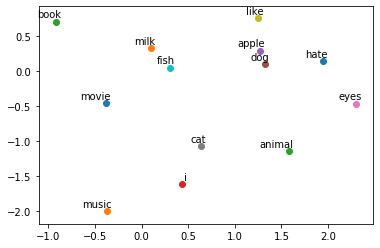

In [8]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

for epoch in range(5000):
    input_batch, target_batch = random_batch(skip_grams, batch_size)
    
    input_batch = Variable(torch.Tensor(input_batch))
    target_batch = Variable(torch.LongTensor(target_batch))
    
    optimizer.zero_grad()
    output = model(input_batch)
    
    # output : [batch_size, voc_size], target_batch : [batch_size] (LongTensor, not one-hot)
    loss = criterion(output, target_batch)
    if (epoch + 1)%1000 == 0:
        print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.6f}'.format(loss))

    loss.backward()
    optimizer.step()
    
for i, label in enumerate(word_list):
    W, WT = model.parameters()
    x, y = float(W[i][0]), float(W[i][1])
    print(x, y)
    plt.scatter(x, y)
    plt.annotate(label, xy=(x, y), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom')
plt.show()